# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

current_btc_response = requests.get(btc_url).json()
my_btc_price = current_btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price

current_eth_response = requests.get(eth_url).json()
my_eth_price = current_eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto

my_btc_value = my_btc*my_btc_price
my_eth_value = my_eth*my_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $85394.22
The current value of your 5.3 ETH is $11757.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares

my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY", "PKH6BQ6D1QM5Y8ZCRE16")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY","Ucvw6j2Og78a5kOrRF49CcF8CtyafrdduucYFgJ3")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets/",
    api_version="v2")

In [8]:
print(alpaca_api_key)

PKH6BQ6D1QM5Y8ZCRE16


In [9]:
# Format current date as ISO format

today = pd.Timestamp(year = 2021,  month = 3, day = 11, 
                  hour = 15, second = 49, tz = 'US/Eastern').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame

df_portfolio


AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-03-11 00:00:00-05:00  114.47  114.54  114.295  114.44  5740793  392.23   

                                                            
                             high     low  close    volume  
time                                                        
2021-03-11 00:00:00-05:00  395.65  391.74  393.5  77022138

In [10]:
# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.44
Current SPY closing price: $393.5


In [11]:
# Compute the current value of shares

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")


The current value of your 50 SPY shares is $19675.00
The current value of your 200 AGG shares is $22888.00


### Savings Health Analysis

In [12]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame

total_assets = [(my_btc_value+my_eth_value),(my_spy_value+my_agg_value)]

df_savings = pd.DataFrame(total_assets, index=["cryptos","shares"],columns=["amount"])


# Display savings DataFrame
display(df_savings)


,amount
cryptos,97151.718646
shares,42563.000000


<AxesSubplot:ylabel='amount'>

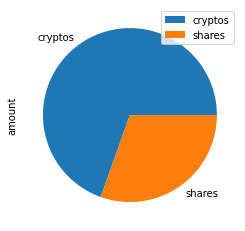

In [13]:
# Plot savings pie chart

df_savings.plot.pie(y="amount")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_saving = df_savings.sum().values

# Validate saving health 

if total_saving > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
    
elif total_saving == emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
    
else:
    print(f"You are $({emergency_fund}-{total_saving}) away from reaching your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

# Set timeframe to '1D'
timeframe = "1D"
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [35]:
# Get 5 years' worth of historical data for SPY and AGG

tickers=["SPY","AGG"]

df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end= end_date ,limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [37]:
# Printing the simulation input data

MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
time                                              
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012881,0.998158,1.004979,1.011923,1.000547,1.012421,1.009156,1.006362,1.001410,0.991279,...,1.009041,1.002354,0.990887,1.011005,0.986062,0.991416,1.012434,0.992267,1.007171,0.996091
2,1.025124,0.995676,1.015374,0.994589,0.995034,1.000565,0.996037,1.004178,1.008990,0.995420,...,1.001814,0.997193,0.999381,1.010829,0.981813,0.999961,1.019540,0.991143,1.002250,0.983931
3,1.006537,0.992550,1.006625,0.998916,0.995714,1.007955,0.990730,0.997943,1.015577,1.000603,...,0.992833,0.993988,1.003645,1.010963,0.981798,1.002505,1.008101,0.984053,1.001222,0.993673
4,1.009696,0.989664,0.998826,1.004923,0.992638,1.026093,0.997904,1.002044,1.014144,1.011343,...,0.993343,1.001347,0.990501,1.021075,0.973760,0.982246,1.003804,0.985941,1.003174,0.983125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.004902,10.313071,10.809478,13.133413,15.755208,58.266315,11.780868,7.150182,12.889995,9.152429,...,9.451988,16.926567,18.737936,8.570810,13.984608,6.268017,12.926874,16.100109,3.627241,13.502302
7557,13.103404,10.412463,10.830582,12.880688,15.737992,58.210120,11.757528,7.140838,12.915047,9.140280,...,9.484072,16.789694,18.691175,8.644670,14.031320,6.328040,12.956897,16.123456,3.643436,13.282125
7558,13.013394,10.368015,10.833216,12.777142,15.630308,58.710075,11.710924,7.057113,12.787160,9.147011,...,9.360150,16.774752,18.693986,8.568313,14.222781,6.255905,13.005029,16.131092,3.648320,13.237266
7559,13.017075,10.156761,10.897534,12.894161,15.424078,59.413656,11.646091,7.056625,12.875782,8.993197,...,9.335677,16.786678,18.574793,8.519919,14.096312,6.248110,12.887201,15.908421,3.632233,13.285274


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

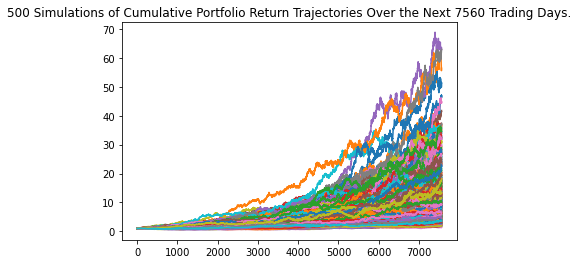

In [38]:
# Plot simulation outcomes

line_plot = MC_even_dist.plot_simulation()

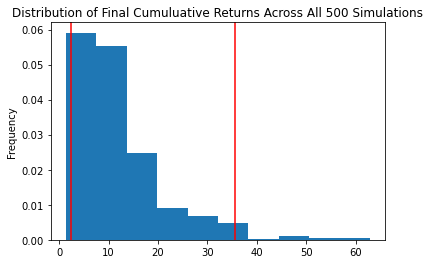

In [40]:
# Plot probability distribution and confidence intervals

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results

even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics

print(even_tbl)

count           500.000000
mean             12.215205
std               9.277012
min               1.344713
25%               5.885675
50%               9.815505
75%              15.300757
max              62.947198
95% CI Lower      2.432329
95% CI Upper     35.562981
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48646.59 and $711259.62


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72969.88 and $1066889.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")